# –ó–∞–¥–∞–Ω–∏–µ 2

In [5]:
import warnings
warnings.filterwarnings("ignore")

–ü–æ–¥–∫–ª—é—á–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from gensim.models import Word2Vec
import pickle
import mlflow
from mlflow.models import infer_signature

–°—á–∏—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏ —Ñ–æ—Ä–º–∏—Ä—É–µ–º dataset. –í—ã–≤–æ–¥–∏–º –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –Ω–µ–º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö.

In [10]:
dataset = pd.read_csv('dataset.csv')
dataset.head(10)

subject_id  Count_subj  study_id  cart_id  Healthy_Status eeg_time   \
0    19557662          27  40000017  6848296               0   8:44 AM   
1    18477137          93  40000029  6848296               0   9:54 AM   
2    16598616           3  40000035  6376932               1   9:07 AM   
3    16368287           7  40000079  6214760               1   5:14 PM   
4    18370366           2  40000084  6632385               0   1:52 PM   
5    15606157          55  40000089  6632385               0   2:29 PM   
6    12576058          43  40000115  6852956               1  12:54 PM   
7    14691089           1  40000143  6551957               0  10:01 AM   
8    14144725           7  40000144  6924910               0   7:24 AM   
9    16089780           2  40000152  6919786               0  12:35 PM   

    eeg_date                    report_0  \
0  27.06.2015               Sinus rhythm   
1  27.06.2015               Sinus rhythm   
2  28.06.2015          Sinus tachycardia   
3  15.07.2015               Sinus rhythm   
4  27.09.2015               Sinus rhythm   
5  29.10.2013               Sinus rhythm   
6  23.03.2016               Sinus rhythm   
7  10.12.2016               Sinus rhythm   
8  11.12.2011  Sinus rhythm with PAC(s).   
9  13.12.2011               Sinus rhythm   

                                            report_1  \
0                  Possible right atrial abnormality   
1                  Possible right atrial abnormality   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                 rSr'(V1) - probable normal variant   
8                                                NaN   
9  Extensive T wave changes may be due to myocard...   

                               report_2  ...                    filtering  \
0                                   NaN  ...  60 Hz notch Baseline filter   
1                                   NaN  ...  60 Hz notch Baseline filter   
2            Normal ECG except for rate  ...  60 Hz notch Baseline filter   
3                            Normal ECG  ...  60 Hz notch Baseline filter   
4                                   NaN  ...              <not specified>   
5                                   NaN  ...              <not specified>   
6                            Normal ECG  ...  60 Hz notch Baseline filter   
7  Low QRS voltages in precordial leads  ...  60 Hz notch Baseline filter   
8                        Borderline ECG  ...  60 Hz notch Baseline filter   
9                                   NaN  ...  60 Hz notch Baseline filter   

  rr_interval p_onset  p_end qrs_onset qrs_end t_end p_axis qrs_axis t_axis  
0         659      40    128       170     258   518     81       77     79  
1         722      40    124       162     246   504     77       75     70  
2         600      40    130       162     244   474     79       72     77  
3         659      40    146       180     254   538     79       66     69  
4         659     368  29999       504     590   868     84       80     77  
5         822     365  29999       499     592   852     26       46     30  
6         952      40    146       198     282   598     24       80     20  
7         923      40    140       188     278   594     26       86     13  
8         952      40    180       196     294   610     59      -17      3  
9        1000      40    156       178     274   584      8      -11     19  

[10 rows x 36 columns]

### –ó–∞–¥–∞–Ω–∏–µ 1
–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Å –ø–æ–º–æ—â—å—é boxplot –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –æ–ø–∏—à–∏—Ç–µ –≤–∞—à–∏ –º—ã—Å–ª–∏ –ø–æ –¥–∞–Ω–Ω—ã–º.

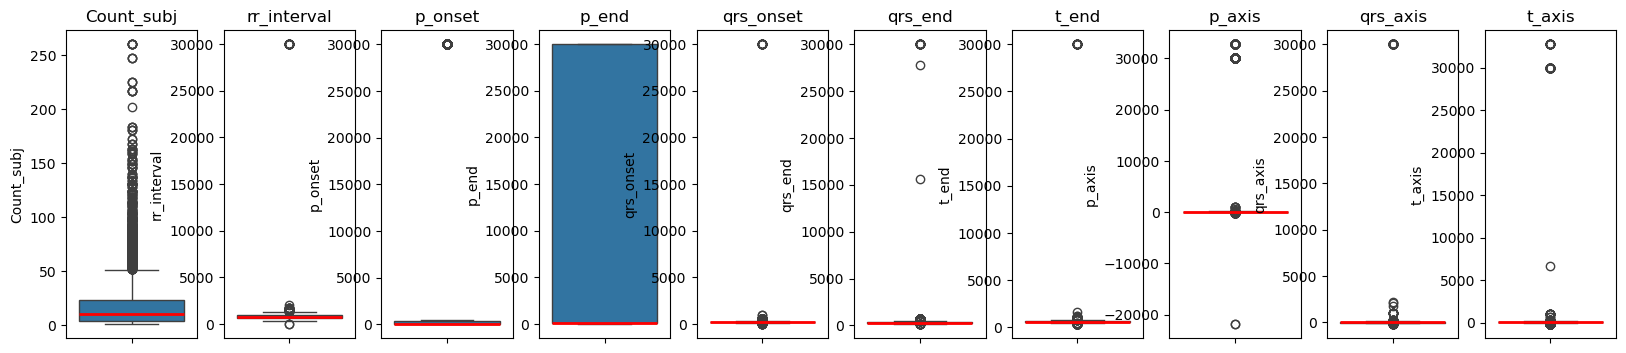

In [12]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numerical_cols = ['Count_subj', 'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
n = len(numerical_cols)
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    index = dataset.columns.get_loc(numerical_cols[i]) # –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å
    plt.sca(ax[i])
    col = dataset.columns[index]
    ax[i].set_title(col)
    sns.boxplot(y=dataset.iloc[:,index], data=dataset, medianprops={'color': 'r', 'linewidth': 2})

–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:

- Healthy_Status:
–ë–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ (0 –∏–ª–∏ 1), –≥–¥–µ 0 –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ç–æ–ª–æ–≥–∏–∏, –∞ 1 ‚Äî –Ω–æ—Ä–º—É. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å –ø–æ–º–æ—â—å—é value_counts().
- –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
rr_interval: –ò–Ω—Ç–µ—Ä–≤–∞–ª RR (–≤—Ä–µ–º—è –º–µ–∂–¥—É —Å–µ—Ä–¥–µ—á–Ω—ã–º–∏ —Å–æ–∫—Ä–∞—â–µ–Ω–∏—è–º–∏). –í—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –∞—Ä–∏—Ç–º–∏–∏.
p_axis, qrs_axis, t_axis: –≠–ª–µ–∫—Ç—Ä–∏—á–µ—Å–∫–∏–µ –æ—Å–∏ —Å–µ—Ä–¥—Ü–∞. –ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –ø–∞—Ç–æ–ª–æ–≥–∏—è—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—Å–∏ –≤–ª–µ–≤–æ/–≤–ø—Ä–∞–≤–æ).
- –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
report_0, report_1, –∏ —Ç.–¥.: –¢–µ–∫—Å—Ç–æ–≤—ã–µ –æ–ø–∏—Å–∞–Ω–∏—è –¥–∏–∞–≥–Ω–æ–∑–æ–≤. –ú–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —á–∞—Å—Ç—ã–µ —Ç–µ—Ä–º–∏–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, "Sinus rhythm", "Abnormal ECG").
- –í—ã–±—Ä–æ—Å—ã:
–ù–∞ boxplot –¥–ª—è rr_interval –≤–∏–¥–Ω—ã –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã, —á—Ç–æ –º–æ–∂–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –±—Ä–∞–¥–∏–∫–∞—Ä–¥–∏–∏ (—Å–ª–∏—à–∫–æ–º –º–µ–¥–ª–µ–Ω–Ω—ã–π —Ä–∏—Ç–º) –∏–ª–∏ —Ç–∞—Ö–∏–∫–∞—Ä–¥–∏–∏ (—Å–ª–∏—à–∫–æ–º –±—ã—Å—Ç—Ä—ã–π —Ä–∏—Ç–º).
- –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –∏ –ø—Ä–æ–ø—É—Å–∫–∏:
–í –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, filtering —Å–æ–¥–µ—Ä–∂–∏—Ç "<not specified>"). –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∞–Ω–∞–ª–∏–∑.
–ü—Ä–∏–º–µ—Ä—ã –∞–Ω–æ–º–∞–ª–∏–π:

–ó–Ω–∞—á–µ–Ω–∏—è 29999 –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö p_onset, p_end –∏ –¥—Ä. ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ, –º–∞—Ä–∫–µ—Ä—ã –æ—à–∏–±–æ–∫ –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –¥–∞–Ω–Ω—ã—Ö.
–í Healthy_Status –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –±–æ–ª—å—à–µ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ —Å –ø–∞—Ç–æ–ª–æ–≥–∏—è–º–∏).


### –ó–∞–¥–∞–Ω–∏–µ 2
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏  –ø—Ä–æ–≤–µ–¥–∏—Ç–µ –∏—Ö –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É (–æ—á–∏—Å—Ç–∫—É, –æ–±–æ–≥–∞—â–µ–Ω–∏–µ).

In [15]:
# –ü—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ —Å–ª–æ–≤–µ—Å—Ç–Ω—ã—Ö —Ä–µ–ø–æ—Ä—Ç–æ–≤ word2vec –≤ —á–∏—Å–ª–æ–≤–æ–π –≤–µ–∫—Ç–æ—Ä

# –£–±–∏—Ä–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
columns_to_filter = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
full_df_filtered = dataset[(dataset[columns_to_filter] < 2000).all(axis=1)]
full_df_filtered = full_df_filtered[(full_df_filtered['p_onset'] < full_df_filtered['p_end']) & (full_df_filtered['qrs_onset'] < full_df_filtered['qrs_end'])]

# –°–ª–µ–ø–ª—è–µ–º –≤—Å–µ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –æ—Ç—á–µ—Ç—ã –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π
reports = [f'report_{x}' for x in range(18)]
full_df_filtered['report_0'] = full_df_filtered[reports].astype(str).agg(' '.join, axis=1)
full_df_filtered['report_0'] = full_df_filtered['report_0'].str.replace(r'\bnan\b', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
full_df_filtered.rename(columns={'report_0': 'report'}, inplace=True)
reports_to_drop = [f'report_{x}' for x in range(1, 18)]
full_df_filtered = full_df_filtered.drop(reports_to_drop, axis=1)

# –ò—Å–ø—Ä–∞–≤–ª—è–µ–º –∏–º–µ–Ω–∞ —Å—Ç–æ–ª–±—Ü–æ–≤
full_df_filtered = full_df_filtered.rename(columns={'eeg_time ': 'eeg_time', 'eeg_date ': 'eeg_date'})
full_df_filtered = full_df_filtered.drop(columns = ['bandwidth', 'filtering'])

# –î–µ–ª–∞–µ–º –∫–æ–ª–æ–Ω–∫—É —Å —Ç–∞—Ä–≥–µ—Ç–∞–º–∏ –∫—Ä–∞–π–Ω–µ–π —Å–ø—Ä–∞–≤–∞
full_df_filtered = full_df_filtered[[col for col in full_df_filtered.columns if col != 'Healthy_Status'] + ['Healthy_Status']]

# –†–∞–∑–±–∏–≤–∞–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å —Ç–µ–∫—Å—Ç–æ–≤—ã–º –æ—Ç—á–µ—Ç–æ–º –Ω–∞ —Ç–æ–∫–µ–Ω—ã
words = [text.split() for text in full_df_filtered['report']]

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å Word2Vec
w2v_model = Word2Vec(words)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–µ–≥–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞ —Å—Ç—Ä–æ–∫–∏
def get_sentence_embedding(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # –£—Å—Ä–µ–¥–Ω—ë–Ω–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
    else:
        return np.zeros(w2v_model.vector_size)  # –ù—É–ª–µ–≤–æ–π –≤–µ–∫—Ç–æ—Ä, –µ—Å–ª–∏ —Å–ª–æ–≤–∞ –Ω–µ—Ç –≤ –º–æ–¥–µ–ª–∏

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–π –∫–æ–ª–æ–Ω–∫–µ –∏ –ø–µ—Ä–µ–≤–æ–¥–∏–º –∫–∞–∂–¥—ã–π –≤–µ–∫—Ç–æ—Ä –≤ –æ–¥–Ω–æ —á–∏—Å–ª–æ
full_df_filtered['report'] = full_df_filtered['report'].apply(lambda x: get_sentence_embedding(x).mean())

full_df_filtered.head()

subject_id  Count_subj  study_id  cart_id  eeg_time    eeg_date    report  \
0    19557662          27  40000017  6848296   8:44 AM  27.06.2015  0.033905   
1    18477137          93  40000029  6848296   9:54 AM  27.06.2015  0.033905   
2    16598616           3  40000035  6376932   9:07 AM  28.06.2015 -0.007944   
3    16368287           7  40000079  6214760   5:14 PM  15.07.2015 -0.000183   
6    12576058          43  40000115  6852956  12:54 PM  23.03.2016 -0.000183   

   rr_interval  p_onset  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0          659       40    128        170      258    518      81        77   
1          722       40    124        162      246    504      77        75   
2          600       40    130        162      244    474      79        72   
3          659       40    146        180      254    538      79        66   
6          952       40    146        198      282    598      24        80   

   t_axis  Healthy_Status  
0      79               0  
1      70               0  
2      77               1  
3      69               1  
6      20               1

### –ó–∞–¥–∞–Ω–∏–µ 3
–°—Ñ–æ—Ä–º–∏—Ä—É–π—Ç–µ –æ—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, —Å–æ—Å—Ç–æ—è—â–∏–π –∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≠–ö–ì –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ Healthy_Status, –∑–∞–Ω–æ–≤–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å boxplot –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–º.

In [17]:
# make new dataset from old columns
table_data = full_df_filtered[['report','rr_interval','p_end','qrs_onset','qrs_end','t_end','p_axis','qrs_axis','t_axis','Healthy_Status']].copy()
table_data.head()

report  rr_interval  p_end  qrs_onset  qrs_end  t_end  p_axis  qrs_axis  \
0  0.033905          659    128        170      258    518      81        77   
1  0.033905          722    124        162      246    504      77        75   
2 -0.007944          600    130        162      244    474      79        72   
3 -0.000183          659    146        180      254    538      79        66   
6 -0.000183          952    146        198      282    598      24        80   

   t_axis  Healthy_Status  
0      79               0  
1      70               0  
2      77               1  
3      69               1  
6      20               1

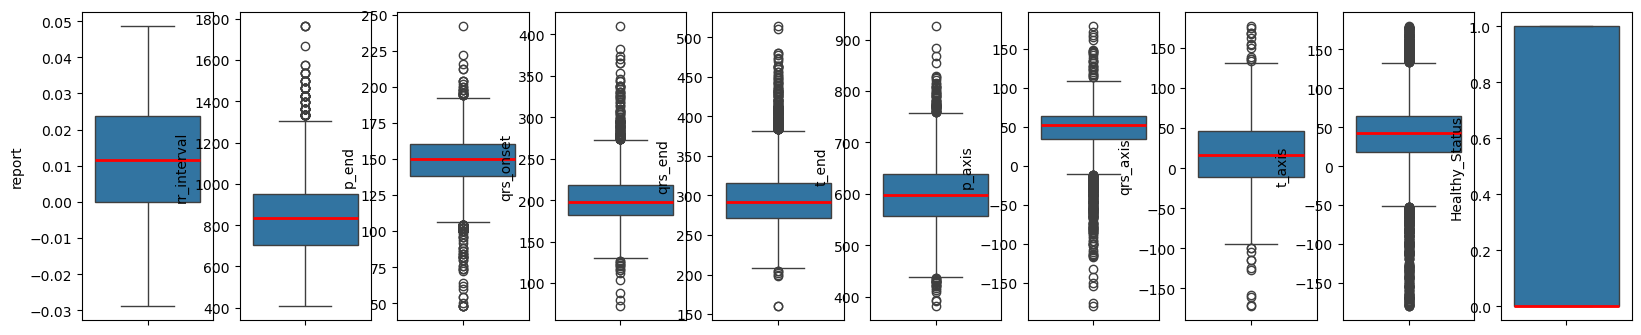

In [19]:
n = table_data.shape[1]
fig,ax = plt.subplots(1,n, figsize=(n*2,4), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = table_data.columns[i]
    sns.boxplot(y = table_data.iloc[:,i],data=table_data, medianprops={"color": "r", "linewidth": 2})

### –ó–∞–¥–∞–Ω–∏–µ 4
–ü—Ä–æ–≤–µ–¥–∏—Ç–µ –æ—Ü–µ–Ω–∫—É –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ heatmap.


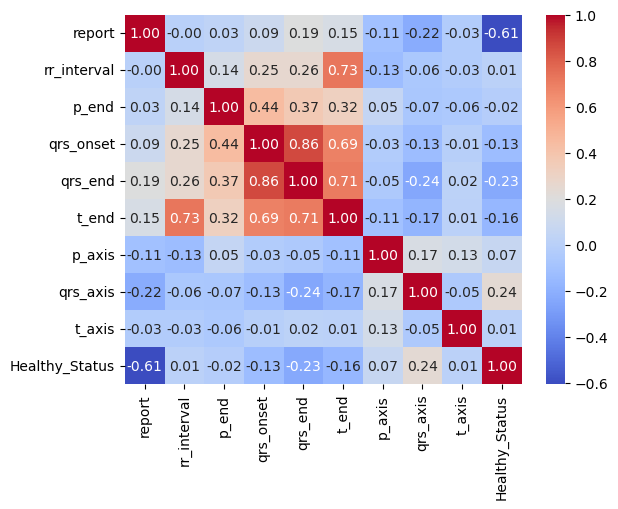

In [21]:
sns.heatmap(table_data.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

### –ó–∞–¥–∞–Ω–∏–µ 5
–ù–∞ –æ—Å–Ω–æ–≤–µ —Ç–∞—Ä–≥–µ—Ç–∞ (—Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞) Healthy_Status –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Å –ø–æ–º–æ—â—å—é pairplot.


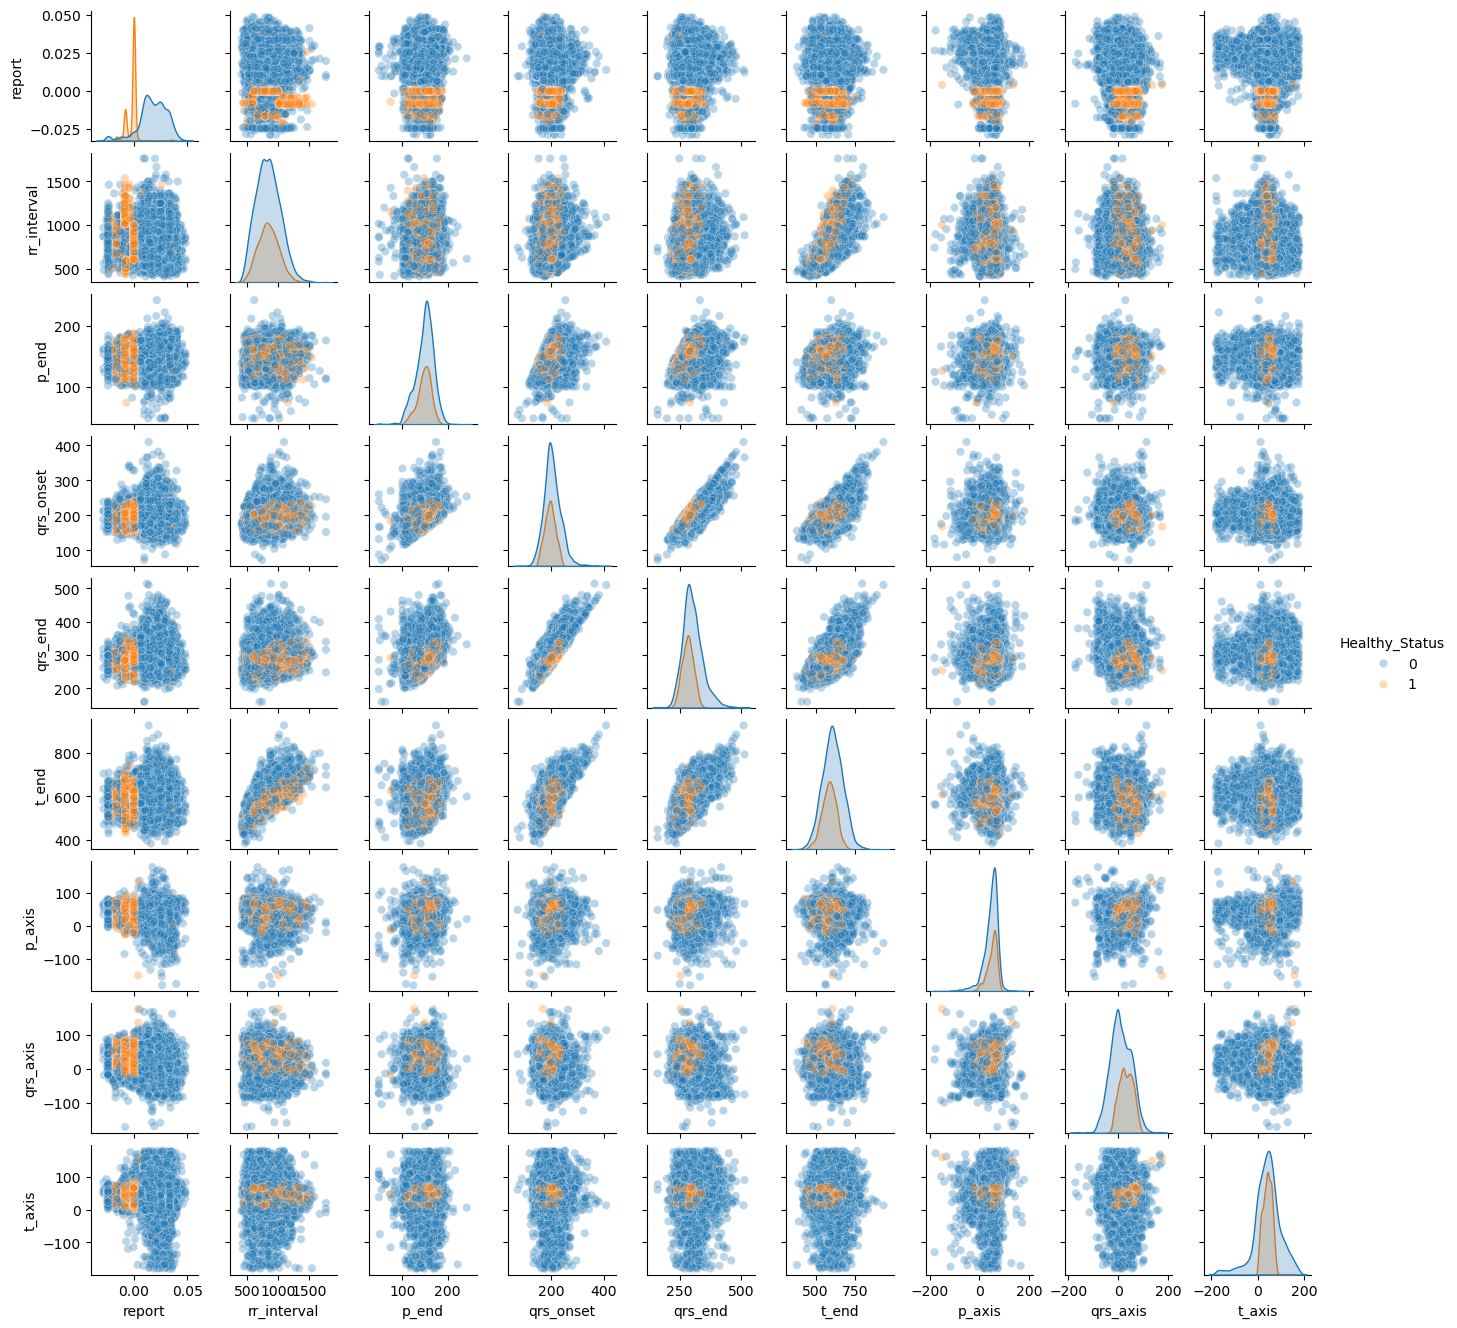

In [23]:
sns.pairplot(table_data, hue = "Healthy_Status",
             height=1.5,
             plot_kws=dict(alpha=0.3))

### –ó–∞–¥–∞–Ω–∏–µ 6
–ü—Ä–æ–≤–µ—Å—Ç–∏ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ PCA –∏ —Å –ø–æ–º–æ—â—å—é TSNE.


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
table_data_pca = table_data
table_data_pca = table_data_pca.drop('Healthy_Status', axis = 1)
table_data_pca.columns

Index(['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')

In [28]:
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)
pca = PCA(n_components = 2).fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(7046, 10) (7046, 2)


In [30]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))
#To see how much variance is preserved for each dataset.

[0.34566823 0.14216422]
0.48783245202854975


In [31]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 48.78% explained variance
3 components at 61.49% explained variance
4 components at 72.99% explained variance
5 components at 82.08% explained variance
6 components at 90.17% explained variance


Text(0, 0.5, 'Second Principal Component')

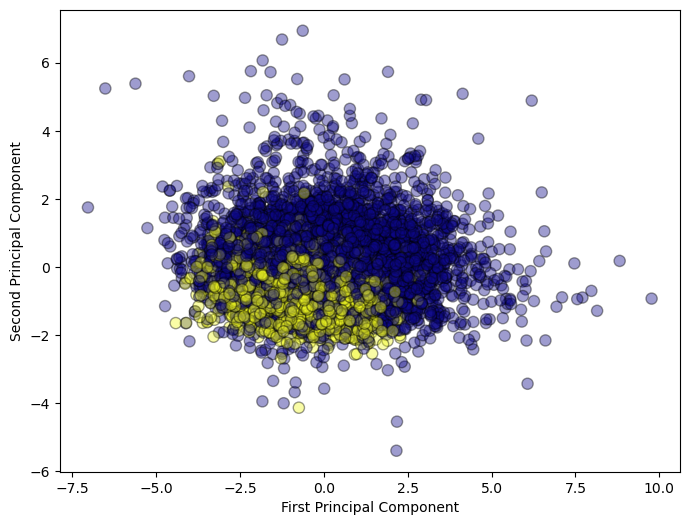

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### –ó–∞–¥–∞–Ω–∏–µ 7
–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–∞–Ω–Ω—ã—Ö

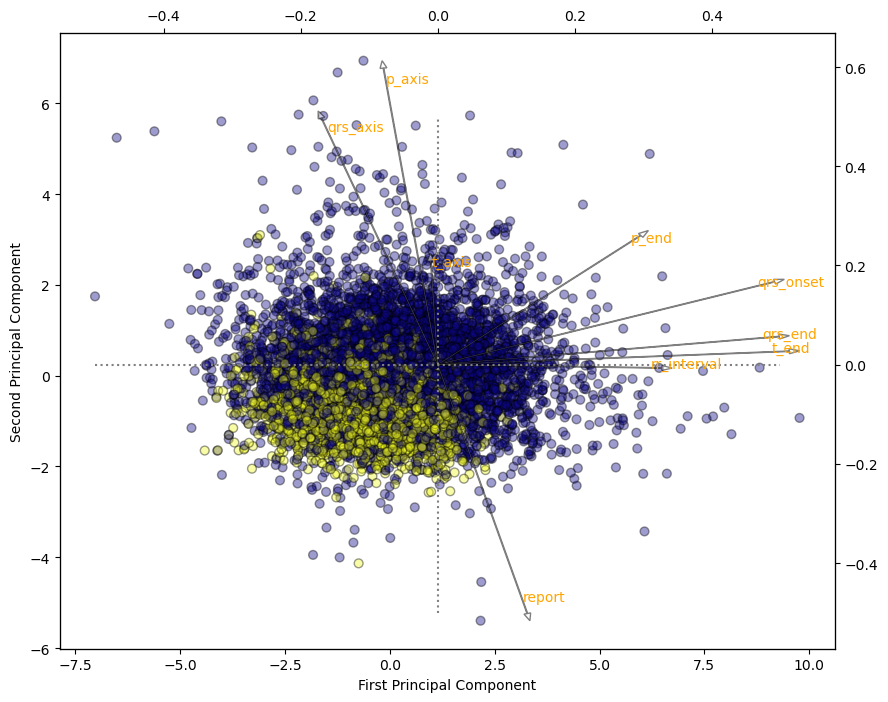

In [36]:
# put feature values into dataframe
components = pd.DataFrame(pca.components_.T, index=table_data_pca.columns, columns= ['PCA1','PCA2'])
# plot size
plt.figure(figsize=(10,8))
# main scatterplot
plt.scatter(x_pca[:,0], x_pca[:,1], c=full_df_filtered['Healthy_Status'],
            cmap='plasma', alpha=0.4, edgecolors='black', s=40);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.ylim(15,-15);
#plt.xlim(20,-20);

# individual feature values
ax2 = plt.twinx().twiny();
#ax2.set_ylim(-0.5,0.5);
#ax2.set_xlim(-0.5,0.5);

# reference lines
ax2.hlines(0,-0.5,0.5, linestyles='dotted', colors='grey')
ax2.vlines(0,-0.5,0.5, linestyles='dotted', colors='grey')

# offset for labels
offset = 0.95
# arrow & text
for a, i in enumerate(components.index):
  ax2.arrow(0, 0, components['PCA1'][a], -components['PCA2'][a], alpha=0.5, facecolor='white', head_width=.01)
  ax2.annotate(i, (components['PCA1'][a]*offset, -components['PCA2'][a]*offset), color='orange')

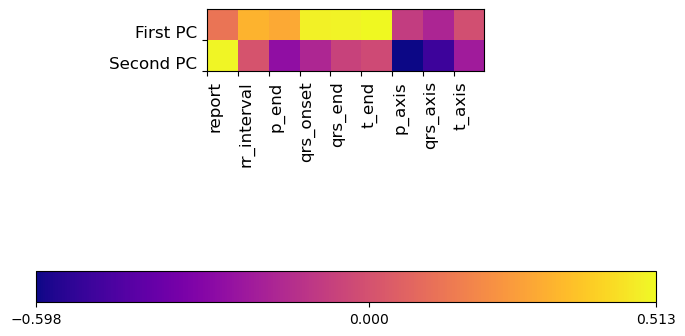

In [38]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(table_data_pca.columns)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left',fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom',fontsize=12);
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()],pad=0.65);

Text(0, 0.5, 'Second Principal Component')

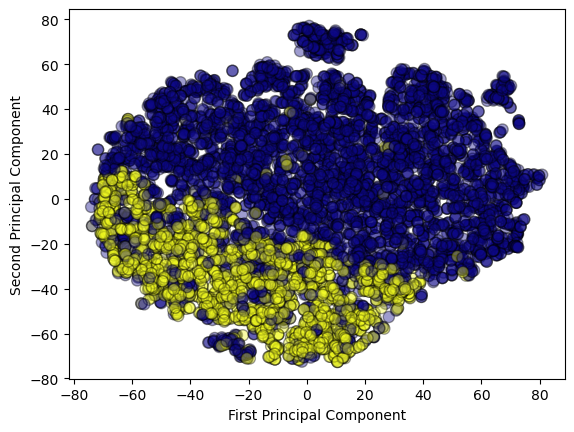

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)
scaled_data_tsne = tsne.fit_transform(scaled_data)
plt.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1], c=full_df_filtered['Healthy_Status'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [41]:
from sklearn import manifold
from time import time

Time code evaluation for perplexity=1 in 3.1 sec
Time code evaluation for perplexity=5 in 3 sec
Time code evaluation for perplexity=10 in 3.5 sec
Time code evaluation for perplexity=15 in 3.7 sec
Time code evaluation for perplexity=20 in 4 sec
Time code evaluation for perplexity=30 in 4.5 sec
Time code evaluation for perplexity=40 in 5.1 sec
Time code evaluation for perplexity=50 in 5.6 sec
Time code evaluation for perplexity=100 in 7.3 sec


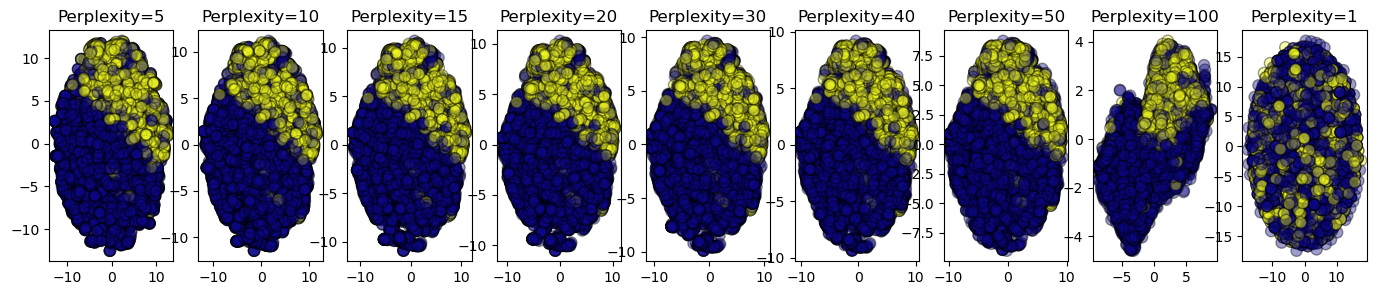

In [43]:
n_components = 2
perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]

(fig, subplots) = plt.subplots(1, len(perplexities), figsize=(17, 3))

for i, perplexity in enumerate(perplexities):
    ax = subplots[i-1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
        )

    scaled_data_tsne = tsne.fit_transform(scaled_data)
    t1 = time()

    print("Time code evaluation for perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(scaled_data_tsne[:,0], scaled_data_tsne[:,1],
               c=full_df_filtered['Healthy_Status'],
               cmap='plasma',
               alpha=0.4,
               edgecolors='black',
               s=65
               );
    ax.axis("tight")

–ú–µ—Ç–æ–¥—ã PCA –∏ TSNE –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤, –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö perplexity —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã.

### –ó–∞–¥–∞–Ω–∏–µ 8

In [46]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
table_data.columns

Index(['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status'],
      dtype='object')

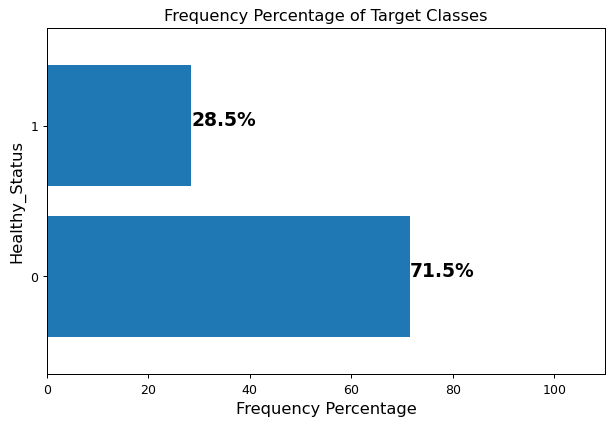

In [48]:
clf_index = 9
plt.figure(figsize=(35,20), dpi=90)
table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

labels = table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=13)
plt.ylabel(table_data.columns[clf_index], fontsize=13)
plt.title('Frequency Percentage of Target Classes', fontsize=13)
plt.show()

–í–∏–¥–µ–Ω –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤, –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –Ω–µ–≥–æ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
target_column = 'Healthy_Status'

smote = SMOTE(random_state=0)
X_initial = table_data.drop(target_column, axis=1)
y_initial = table_data[target_column]

X, y = smote.fit_resample(X_initial, y_initial)

df = pd.DataFrame(X, columns=X_initial.columns)
df[target_column] = y

df[target_column].value_counts()

Healthy_Status
0    5039
1    5039
Name: count, dtype: int64

In [52]:
X = df.drop(df.columns[[clf_index]], axis=1).iloc[:,:]
y = pd.Series(LabelEncoder().fit_transform(df.iloc[:, clf_index]))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0, stratify=y.values)

–í–æ–∑—å–º–µ–º –∑–∞ –±–∞–∑–æ–≤—É—é –æ—Ç–º–µ—Ç–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏ –Ω–∞–∏–≤–Ω–æ–≥–æ –≥–∞—É—Å—Å–æ–≤—Å–∫–æ–≥–æ –±–∞–π–µ—Å–æ–≤—Å–∫–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞

In [55]:
—Ålassifier = GaussianNB()
—Ålassifier.fit(X_train, y_train)

GaussianNB()

In [56]:
y_train__pred = —Ålassifier.predict(X_train)
y_test__pred = —Ålassifier.predict(X_test)

In [57]:
(
    f'Accuracy train data {accuracy_score(y_train, y_train__pred)}',
    f'Accuracy test data {accuracy_score(y_test, y_test__pred)}'
)

('Accuracy train data 0.8807768641905303',
 'Accuracy test data 0.8915343915343915')

In [58]:
(
    f'F1 score train data {f1_score(y_train, y_train__pred)}',
    f'F1 score test data {f1_score(y_test, y_test__pred)}'
)

('F1 score train data 0.889298407266026',
 'F1 score test data 0.8986402966625463')

              precision    recall  f1-score   support

        True       0.96      0.82      0.88      1512
       False       0.84      0.96      0.90      1512

    accuracy                           0.89      3024
   macro avg       0.90      0.89      0.89      3024
weighted avg       0.90      0.89      0.89      3024



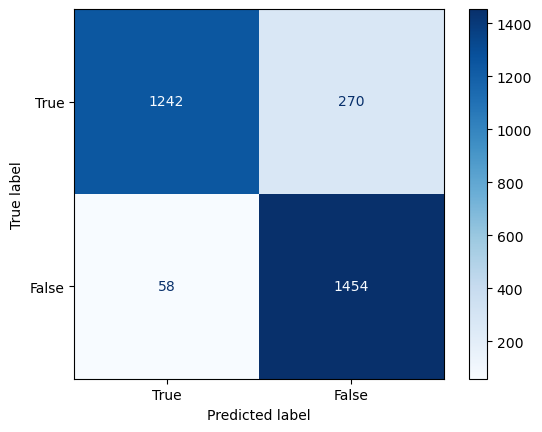

In [59]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_test__pred, labels=labels_names, target_names=target_names))

cm = confusion_matrix(y_test, y_test__pred, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

# LAMA

In [61]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


In [62]:
autoML_df = df[['report', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']].copy()

In [63]:
train_data, test_data = train_test_split(autoML_df, test_size=0.2, stratify=autoML_df['Healthy_Status'], random_state=42)

In [64]:
automl = TabularAutoML(
    task=Task('binary'),
    timeout=100,
    cpu_limit=4,
    reader_params={'n_jobs': 4, 'cv': 3, 'random_state': 42},
)

In [65]:
predictions = automl.fit_predict(train_data, roles={'target': 'Healthy_Status'}, verbose=0)

In [66]:
test_predictions = automl.predict(test_data).data

In [67]:
for i in range(len(test_predictions)):
    if test_predictions[i] > 0.5:
        test_predictions[i] = 1
    else:
        test_predictions[i] = 0

In [68]:
predictions_data = predictions.data
for i in range(len(predictions_data)):
    if predictions_data[i] > 0.5:
        predictions_data[i] = 1
    else:
        predictions_data[i] = 0

In [69]:
(
    f'Accuracy train data {accuracy_score(train_data["Healthy_Status"], predictions_data)}',
    f'Accuracy test data {accuracy_score(test_data["Healthy_Status"], test_predictions)}'
)

('Accuracy train data 0.9858595881915158',
 'Accuracy test data 0.9851190476190477')

In [70]:
(
    f'F1 score train data {f1_score(train_data["Healthy_Status"], predictions_data)}',
    f'F1 score test data {f1_score(test_data["Healthy_Status"], test_predictions)}'
)

('F1 score train data 0.9858314690529456',
 'F1 score test data 0.9850299401197605')

              precision    recall  f1-score   support

        True       0.98      0.99      0.99      1008
       False       0.99      0.98      0.99      1008

    accuracy                           0.99      2016
   macro avg       0.99      0.99      0.99      2016
weighted avg       0.99      0.99      0.99      2016



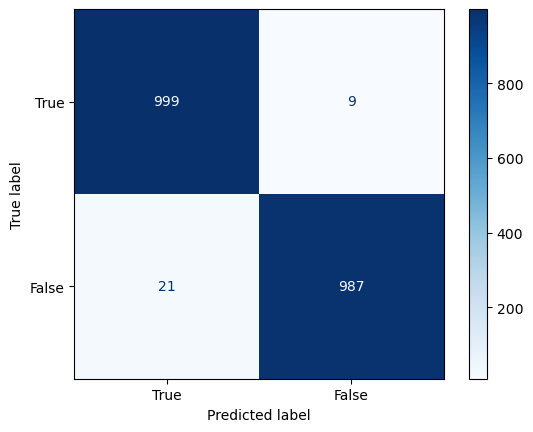

In [71]:
target_names = ['True', 'False']
labels_names = [0, 1]
print(classification_report(test_data['Healthy_Status'], test_predictions, labels=labels_names, target_names=target_names))

cm = confusion_matrix(test_data['Healthy_Status'], test_predictions, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [72]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 1.00000 * (3 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) 


In [73]:
algo = automl.levels[0][0].ml_algos[0]
model = algo.models[0]
print(f'–ê–ª–≥–æ—Ä–∏—Ç–º - {type(algo).__name__}\n–ú–æ–¥–µ–ª—å - {type(model).__name__}\n')

–ê–ª–≥–æ—Ä–∏—Ç–º - BoostLGBM
–ú–æ–¥–µ–ª—å - Booster



In [74]:
with open(f'./lightautoml_electrocardiogram_m2_model.pkl', 'wb') as f:
    pickle.dump(automl, f)

In [75]:
import subprocess
from threading import Thread

def start_mlflow():
    subprocess.run(["mlflow", "ui", "--host", "0.0.0.0", "--port", "5000"])

Thread(target=start_mlflow, daemon=True).start()

In [76]:
mlflow.set_tracking_uri(uri='http://localhost:5000')
mlflow.set_experiment('Task 2')

<Experiment: artifact_location='mlflow-artifacts:/815572667296263577', creation_time=1744220956347, experiment_id='815572667296263577', last_update_time=1744220956347, lifecycle_stage='active', name='Task 2', tags={}>

In [77]:
with mlflow.start_run(run_name='LAMA'):
    mlflow.log_params(
        {
            'n_jobs': 4, 
            'cv': 3, 
            'random_state': 42,
            'timeout': 100,
            'cpu_limit': 4,
            'algoritm': algo,
            'model': model
        }
    )
    mlflow.log_metrics(
        {
            'Accuracy train data': accuracy_score(train_data['Healthy_Status'], predictions_data),
            'Accuracy test data': accuracy_score(test_data["Healthy_Status"], test_predictions),
            'F1 score train data': f1_score(train_data["Healthy_Status"], predictions_data),
            'F1 score test data': f1_score(test_data["Healthy_Status"], test_predictions),
        }
    )
    mlflow.log_artifact('./lightautoml_electrocardiogram_m2_model.pkl')
    
    model_info = mlflow.sklearn.log_model(
        sk_model=automl,
        artifact_path='lama_model',
        signature=infer_signature(train_data, predictions_data),
        input_example=train_data,
    )

üèÉ View run LAMA at: http://localhost:5000/#/experiments/815572667296263577/runs/74dfcec646b34dc080361005971c869d
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577


# FEDOT

In [143]:
from fedot.api.main import Fedot

In [145]:
fedot_model = Fedot(problem='classification', timeout=3)

In [147]:
obtained_pipeline = fedot_model.fit(features=X_train, target=y_train)

2025-04-18 23:22:04,118 - ApiComposer - Initial pipeline was fitted in 2.7 sec.
2025-04-18 23:22:04,119 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 13.4 sec.
2025-04-18 23:22:04,120 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-04-18 23:22:04,133 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-04-18 23:22:04,275 - ApiComposer - Pipeline composition started.


Generations:   0%|                                                                          | 0/10000 [00:00<?, ?gen/s]

2025-04-18 23:22:11,223 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-04-18 23:22:20,479 - MultiprocessingDispatcher - 18 individuals out of 21 in previous population were evaluated successfully.
2025-04-18 23:22:25,155 - MultiprocessingDispatcher - 9 individuals out of 10 in previous population were evaluated successfully.
2025-04-18 23:22:26,579 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.


Generations:   0%|                                                               | 1/10000 [00:22<61:37:40, 22.19s/gen]

2025-04-18 23:22:32,142 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2025-04-18 23:22:37,730 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-04-18 23:22:38,888 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|                                                               | 2/10000 [00:34<45:29:04, 16.38s/gen]

2025-04-18 23:22:42,800 - MultiprocessingDispatcher - 16 individuals out of 18 in previous population were evaluated successfully.
2025-04-18 23:22:44,980 - MultiprocessingDispatcher - 17 individuals out of 17 in previous population were evaluated successfully.


Generations:   0%|                                                               | 3/10000 [00:40<32:26:18, 11.68s/gen]

2025-04-18 23:22:53,344 - MultiprocessingDispatcher - 29 individuals out of 31 in previous population were evaluated successfully.
2025-04-18 23:23:00,680 - MultiprocessingDispatcher - 27 individuals out of 27 in previous population were evaluated successfully.
2025-04-18 23:23:00,698 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.


Generations:   0%|                                                               | 4/10000 [00:56<36:51:23, 13.27s/gen]

2025-04-18 23:23:06,176 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-04-18 23:23:06,695 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.


Generations:   0%|                                                               | 5/10000 [01:02<29:34:04, 10.65s/gen]

2025-04-18 23:23:12,240 - MultiprocessingDispatcher - 11 individuals out of 11 in previous population were evaluated successfully.


Generations:   0%|                                                               | 6/10000 [01:07<24:44:53,  8.91s/gen]

2025-04-18 23:23:17,552 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-04-18 23:23:18,020 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.


Generations:   0%|                                                               | 7/10000 [01:13<21:54:03,  7.89s/gen]

2025-04-18 23:23:19,630 - MultiprocessingDispatcher - 11 individuals out of 12 in previous population were evaluated successfully.


Generations:   0%|                                                               | 8/10000 [01:15<16:21:02,  5.89s/gen]

2025-04-18 23:23:21,960 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-04-18 23:23:23,458 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-04-18 23:23:23,463 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.


Generations:   0%|                                                               | 9/10000 [01:19<14:33:39,  5.25s/gen]

2025-04-18 23:23:25,428 - MultiprocessingDispatcher - 4 individuals out of 5 in previous population were evaluated successfully.
2025-04-18 23:23:29,260 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|                                                              | 10/10000 [01:24<15:01:54,  5.42s/gen]

2025-04-18 23:23:34,167 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-04-18 23:23:35,631 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|                                                              | 11/10000 [01:31<15:50:24,  5.71s/gen]

2025-04-18 23:23:36,764 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-04-18 23:23:37,252 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-04-18 23:23:38,373 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.


Generations:   0%|                                                              | 12/10000 [01:33<13:20:06,  4.81s/gen]

2025-04-18 23:23:39,145 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-04-18 23:23:40,456 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|                                                              | 13/10000 [01:36<11:02:37,  3.98s/gen]

2025-04-18 23:23:41,028 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-04-18 23:23:41,690 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-04-18 23:23:43,085 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-04-18 23:23:43,660 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.


Generations:   0%|                                                              | 14/10000 [01:39<10:23:27,  3.75s/gen]

2025-04-18 23:23:44,275 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-04-18 23:23:44,815 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-04-18 23:23:46,554 - MultiprocessingDispatcher - 3 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|                                                               | 15/10000 [01:42<9:40:46,  3.49s/gen]

2025-04-18 23:23:46,575 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|                                                              | 15/10000 [01:42<18:53:39,  6.81s/gen]

2025-04-18 23:23:46,705 - ApiComposer - Hyperparameters tuning started with 1 min. timeout


2025-04-18 23:23:49,620 - SimultaneousTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [lgbm]}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.5931892355539934, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 36, 'n_jobs': 1, 'verbose': -1, 'class_weight': 'balanced', 'num_leaves': 132, 'min_data_in_leaf': 45, 'learning_rate': 0.06538538463180736, 'force_col_wise': True, 'force_row_wise ': False, 'colsample_bytree': 0.9366198710288591, 'subsample': 0.4381899631393325, 'reg_alpha': 0.11351929677839756, 'reg_lambda': 0.001519792663211914} 
Initial metric: [0.996]
  0%|                                        | 24/100000 [01:12<83:55:17,  3.02s/trial, best loss: -0.9972466765462243]
2025-04-18 23:25:05,696 - SimultaneousTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [lgbm]}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.017252185560672102, 'extra_trees': False, 'enable_catego

In [149]:
y_train__predict = fedot_model.predict(X_train)
y_test__predict = fedot_model.predict(X_test)

In [151]:
(
    f'Accuracy train data {accuracy_score(y_train, y_train__predict)}',
    f'Accuracy test data {accuracy_score(y_test, y_test__predict)}'
)

('Accuracy train data 0.9975900198468953',
 'Accuracy test data 0.9831349206349206')

In [153]:
(
    f'F1 score train data {f1_score(y_train, y_train__predict)}',
    f'F1 score test data {f1_score(y_test, y_test__predict)}'
)

('F1 score train data 0.9975930907546369',
 'F1 score test data 0.9831404958677686')

              precision    recall  f1-score   support

        True       0.98      0.98      0.98      1512
       False       0.98      0.98      0.98      1512

    accuracy                           0.98      3024
   macro avg       0.98      0.98      0.98      3024
weighted avg       0.98      0.98      0.98      3024



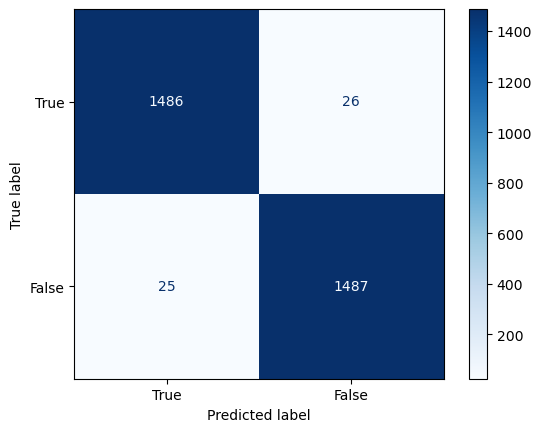

In [155]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_test__predict, labels=labels_names, target_names=target_names))

cm = confusion_matrix(y_test, y_test__predict, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [157]:
fedot_model.current_pipeline

{'depth': 1, 'length': 1, 'nodes': [lgbm]}

In [159]:
with open(f'./fedot_model_task2.pkl', 'wb') as f:
    pickle.dump(fedot_model, f)

In [161]:
with mlflow.start_run(run_name='FEDOT'):
    mlflow.log_params(
        {
            'problem':'classification',
            'timeout': 3,
        }
    )
    mlflow.log_metrics(
        {
            'Accuracy train data': accuracy_score(y_train, y_train__predict),
            'Accuracy test data': accuracy_score(y_test, y_test__predict),
            'F1 score train data': f1_score(y_train, y_train__predict),
            'F1 score test data': f1_score(y_test, y_test__predict)
        }
    )
    mlflow.log_artifact('./fedot_model_task2.pkl')
    
    model_info = mlflow.sklearn.log_model(
        sk_model=fedot_model,
        artifact_path='model_fedot',
        signature=infer_signature(X_train, y_train__predict),
        input_example=X_train,
    )

üèÉ View run FEDOT at: http://localhost:5000/#/experiments/815572667296263577/runs/96caa2c309e242e49227bc6297616e8b
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577


# H2O

In [166]:
import h2o
from h2o.automl import H2OAutoML
import mlflow
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, f1_score, 
                           classification_report, 
                           confusion_matrix, ConfusionMatrixDisplay)
import pickle

In [168]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 21.0.5+-13047016-b750.29, mixed mode)
  Starting server from C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dvm10\AppData\Local\Temp\tmpdtd9xzyz
  JVM stdout: C:\Users\dvm10\AppData\Local\Temp\tmpdtd9xzyz\h2o_dvm10_started_from_python.out
  JVM stderr: C:\Users\dvm10\AppData\Local\Temp\tmpdtd9xzyz\h2o_dvm10_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Europe/Moscow
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    5 months and 16 days
H2O_cluster_name:           H2O_from_python_dvm10_bhya3w
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.932 Gb
H2O_cluster_total_cores:    20
H2O_cluster_allowed_cores:  20
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.4 final
--------------------------  -----------------------------

In [169]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
hf = h2o.H2OFrame(df)
hf['Healthy_Status'] = hf['Healthy_Status'].asfactor()  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


In [170]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
train, test = hf.split_frame(ratios=[0.7], seed=200)
x = hf.columns
x.remove('Healthy_Status')
y = 'Healthy_Status'

In [171]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (—ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç 5 –º–∏–Ω—É—Ç –≤ TPOT)
aml = H2OAutoML(
    max_runtime_secs=300,  # 5 –º–∏–Ω—É—Ç
    seed=42,
    verbosity='info',
    exclude_algos=["DeepLearning", "StackedEnsemble"]  # –î–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã
)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
23:26:07.245: Project: AutoML_1_20250418_232607
23:26:07.246: 5-fold cross-validation will be used.
23:26:07.246: Setting stopping tolerance adaptively based on the training frame: 0.01188792585913685
23:26:07.247: Build control seed: 42
23:26:07.247: training frame: Frame key: AutoML_1_20250418_232607_training_py_3_sid_b75e    cols: 10    rows: 7076  chunks: 1    size: 164867  checksum: -6255081628320331078
23:26:07.247: validation frame: NULL
23:26:07.247: leaderboard frame: NULL
23:26:07.247: blending frame: NULL
23:26:07.247: response column: Healthy_Status
23:26:07.247: fold column: null
23:26:07.247: weights column: null
23:26:07.253: AutoML: XGBoost is not available; skipping it.
23:26:07.255: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20250418_232607_model_91


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    158                158                         308474                 10           10           10            86            253           150.848

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 9.14245696250906e-05
RMSE: 0.00956161961307239
LogLoss: 0.003822064434820299
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8802412802337098
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      3539  0     0        (0.0/3539.0)
1      0     3537  0        (0.0/3537.0)
Total  3539  3537  0        (0.0/7076.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.880241     1         193
max f2                       0.880241     1         193
max f0point5                 0.880241     1         193
max accuracy                 0.880241     1         193
max precision                0.999834     1         0
max recall                   0.880241     1         193
max specificity              0.999834     1         0
max absolute_mcc             0.880241     1         193
max min_per_class_accuracy   0.880241     1         193
max mean_per_class_accuracy  0.880241     1         193
max tns                      0.999834     3539      0
max fns                      0.999834     3519      0
max fps                      9.87436e-06  3539      399
max tps                      0.880241     3537      193
max tnr                      0.999834     1         0
max fnr                      0.999834     0.994911  0
max fpr                      9.87436e-06  1         399
max tpr                      0.880241     1         193

Gains/Lift Table: Avg response rate: 49,99 %, avg score: 49,99 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100339                   0.999681           2.00057  2.00057            1                0.999748     1                           0.999748            0.0200735       0.0200735                  100.057  100.057            0.0200735
2        0.0200678                   0.999612           2.00057  2.00057            1                0.999648     1                           0.999698            0.0200735       0.040147                   100.057  100.057            0.040147
3        0.0301018                   0.999554           2.00057  2.00057            1                0.999585     1                           0.99966             0.0200735       0.0602205                  100.057  100.057            0.0602205
4        0.0401357                   0.999492           2.00057  2.00057            1                0.999519     1                           0.999625            0.0200735       0.080294                   100.057  100.057            0.080294
5        0.0500283                   0.99945            2.00057  2.00057            1                0.999471     1                           0.999594            0.0197908       0.100085            

In [172]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_model = aml.leader

In [173]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
train_pred = best_model.predict(train)['predict'].as_data_frame().values.ravel()
test_pred = best_model.predict(test)['predict'].as_data_frame().values.ravel()

gbm prediction progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
gbm prediction progress: |

C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [174]:
# –ú–µ—Ç—Ä–∏–∫–∏
y_train_true = train['Healthy_Status'].as_data_frame().values.ravel()
y_test_true = test['Healthy_Status'].as_data_frame().values.ravel()

C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [175]:
(
    f'Accuracy train data {accuracy_score(y_train_true, train_pred)}',
    f'Accuracy test data {accuracy_score(y_test_true, test_pred)}'
)

('Accuracy train data 0.9998586772187676',
 'Accuracy test data 0.9786808794137242')

In [176]:
(
    f'F1 score train data {f1_score(y_train_true, train_pred)}',
    f'F1 score test data {f1_score(y_test_true, test_pred)}'
)

('F1 score train data 0.9998586172769688',
 'F1 score test data 0.9784366576819407')

In [177]:
# Classification report
target_names = ['True', 'False']
labels_names = [0, 1]
print(classification_report(y_test_true, test_pred, 
                          labels=labels_names, 
                          target_names=target_names))

              precision    recall  f1-score   support

        True       0.97      0.99      0.98      1500
       False       0.99      0.97      0.98      1502

    accuracy                           0.98      3002
   macro avg       0.98      0.98      0.98      3002
weighted avg       0.98      0.98      0.98      3002



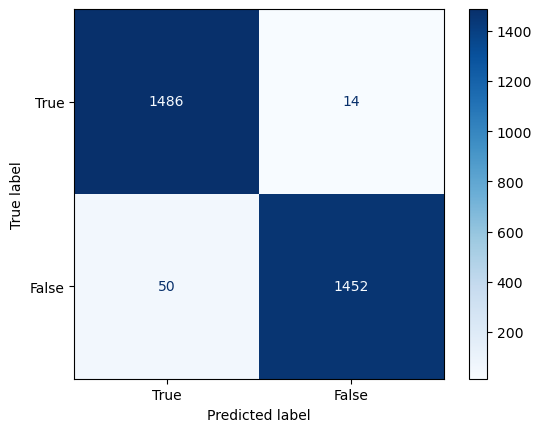

In [178]:
# Confusion matrix
cm = confusion_matrix(y_test_true, test_pred, labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [179]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_path = h2o.save_model(best_model, path="./", force=True)

In [180]:
# –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ MLflow
with mlflow.start_run(run_name='H2O_AutoML'):
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
    mlflow.log_params({
        'max_runtime_secs': 300,
        'seed': 42,
        'algorithm': best_model.algo
    })
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    mlflow.log_metrics({
        'Accuracy_train': accuracy_score(y_train_true, train_pred),
        'Accuracy_test': accuracy_score(y_test_true, test_pred),
        'F1_train': f1_score(y_train_true, train_pred),
        'F1_test': f1_score(y_test_true, test_pred)
    })
    
    # –ê—Ä—Ç–µ—Ñ–∞–∫—Ç—ã
    mlflow.log_artifact(model_path)
    
    # –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ H2O
    mlflow.h2o.log_model(
        h2o_model=best_model,
        artifact_path='h2o_model',
        registered_model_name='H2O_AutoML_Model'
    )

2025/04/18 23:31:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'H2O_AutoML_Model'.
2025/04/18 23:31:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: H2O_AutoML_Model, version 1


üèÉ View run H2O_AutoML at: http://localhost:5000/#/experiments/815572667296263577/runs/d770281544e2431e9741cbac6383c794
üß™ View experiment at: http://localhost:5000/#/experiments/815572667296263577


Created version '1' of model 'H2O_AutoML_Model'.


In [181]:
# –ó–∞–≤–µ—Ä—à–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã H2O
h2o.cluster().shutdown()

H2O session _sid_b75e closed.
